## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATA

In [4]:
data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [5]:
# So,here we drop the EmpNumber column because it's a unique serial number
data.drop('EmpNumber',axis=1,inplace=True)

# 1. Department-wise Performance

In [7]:
department_performance = data.groupby("EmpDepartment")["PerformanceRating"].mean().sort_values(ascending=False)
print("\nDepartment-wise Performance Ratings:\n", department_performance)


Department-wise Performance Ratings:
 EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64


### Insights
#### Department-wise Performance
##### 1. Top Performing Departments:
- Development (3.08)
- Data Science (3.05)

##### 2. Lowest Performing Departments:
- Sales (2.86)
- Finance (2.77)

## DATA PREPROCESSING

### CHECKING NULL VALUES

In [11]:
print(data.isnull().sum())
print('\n')
print(f'--> No Null Values Present')

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


--> No Null Values Present


### CHECKING DUPLICATE VALUES

In [13]:
print(data.duplicated().sum())
print('\n')
print(f'--> No Duplicate Values Present')

0


--> No Duplicate Values Present


### IDENTIFYING OUTLIERS

In [15]:
num_data = data[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

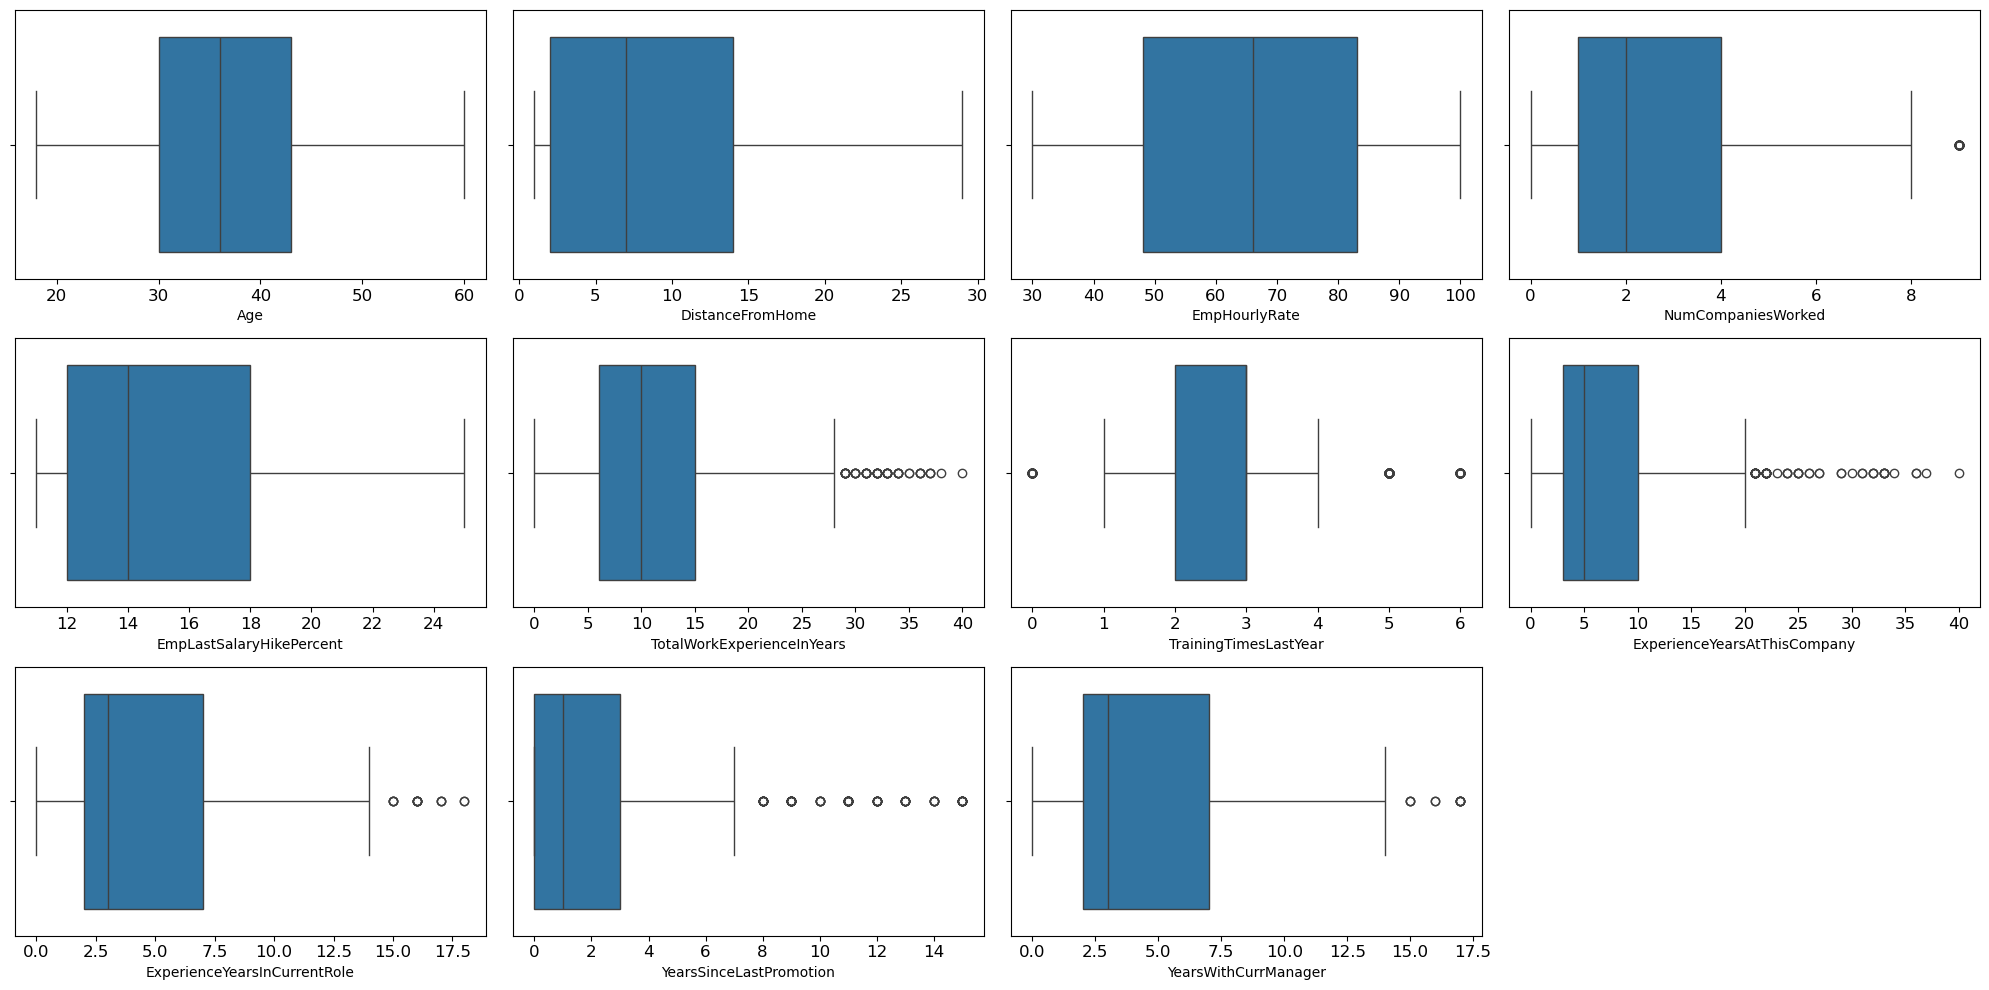

In [16]:
# boxplot to identify outliers
plt.figure(figsize=(20,10))                       # Set Canvas size
plotnumber = 1
for i in num_data.columns :                       # iterate over all columns 
    plt.subplot(3,4,plotnumber)                   # set number of plots in row and columns
    sns.boxplot(x = data[i])                      # visualise through boxplot
    plt.xticks(fontsize=12)                       # set X ticks with size
    plt.yticks(fontsize=12)                       # set y ticks with size
    plotnumber = plotnumber + 1
plt.tight_layout()                                # to avoid overlapping of images

### HANDLING THE OUTLIERS

Winsorization is a statistical technique used to manage outliers by capping extreme values at specified percentiles, rather than removing them entirely. 
This approach modifies the most extreme data points to reduce their influence while preserving the dataset's overall structure.

In [19]:
# Using winsorize method
from scipy.stats.mstats import winsorize
outliers=['NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for i in outliers:
  data[i]=winsorize(data[i],limits=(0.05,0.12))

### CHECKING SKEWNESS
#### Skewness range:
- Between -0.5 and 0.5 : data is fairly symmetrical
- Between -1 and -0.5 or 0.5 and 1 : data is moderately skewed
- Greater than 1 or Less than -1 : data is highly skewed

In [21]:
# Calculating post-outlier skewness
skew_threshold = 1  # Threshold to identify which columns have high skewness(>1)
skewness = data[outliers].skew()
high_skew_cols = skewness[abs(skewness) > skew_threshold].index.tolist()
print("Columns have high skewness:", high_skew_cols)

Columns have high skewness: ['YearsSinceLastPromotion']


### FEATURE TRANSFORMATION
#### Log1p Transformation - Reduces skewness by compressing large values and preserving zeros, making distributions more symmetric and suitable for modeling.

In [23]:
# Apply log1p transformation to highly skewed feature
data['YearsSinceLastPromotion'] = np.log1p(data['YearsSinceLastPromotion'])  # log(x+1) to handle zeros


Final Skewness Values:
NumCompaniesWorked              0.631916
TotalWorkExperienceInYears      0.404538
TrainingTimesLastYear           0.001475
ExperienceYearsAtThisCompany    0.489471
ExperienceYearsInCurrentRole    0.307460
YearsSinceLastPromotion         0.517349
YearsWithCurrManager            0.239568
dtype: float64


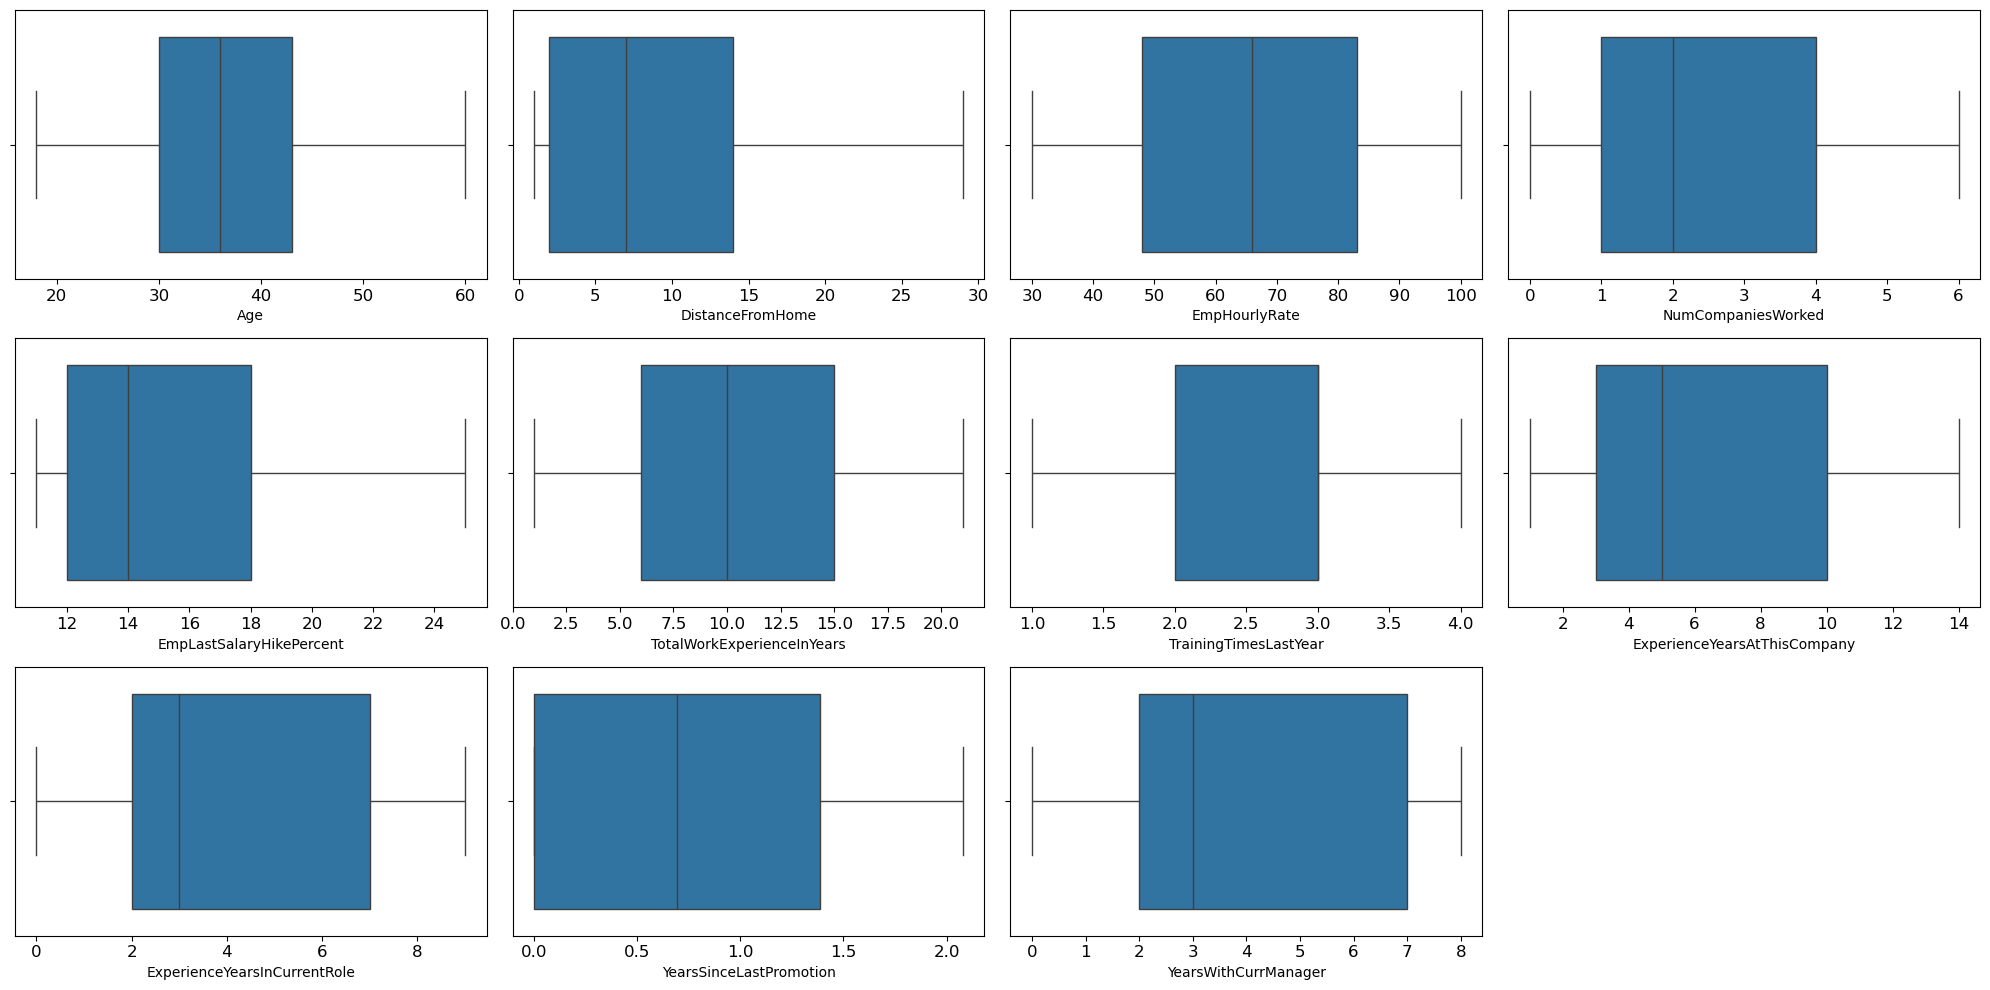

In [24]:
# Boxplot Verification
plt.figure(figsize=(20,10))                       
plotnumber = 1
for i in num_data.columns :                       
    plt.subplot(3,4,plotnumber)                  
    sns.boxplot(x = data[i])                      
    plt.xticks(fontsize=12)                       
    plt.yticks(fontsize=12)                       
    plotnumber = plotnumber + 1
plt.tight_layout()

# Skewness Report
print("\nFinal Skewness Values:")
print(data[outliers].skew())

### ENCODING CATEGORICAL COLUMN

In [26]:
cat_data = data[['Gender', 'EducationBackground', 'MaritalStatus','EmpDepartment', 'EmpJobRole',
       'BusinessTravelFrequency', 'OverTime', 'Attrition']]
cat_data.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

In [27]:
# Checking the value_counts 
for i in cat_data.columns:
    print(data[i].value_counts())
    print('============================')
    print("\n")

Gender
Male      725
Female    475
Name: count, dtype: int64


EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64


MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64


EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64


EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative 

In [28]:
from sklearn.preprocessing import LabelEncoder # convert categorical data to numerical
for i in cat_data.columns:
    data[i]=LabelEncoder().fit_transform(data[i])
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0.000000,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,0.693147,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,14,9,0.693147,8,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,21,2,2,14,6,2.079442,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,1.098612,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0.000000,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0.000000,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,14,8,1.386294,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,2.079442,7,0,3


#### Label Encoding is used to convert categorical columns into numerical form by assigning each category a unique integer. This allows machine learning models that require numerical inputs to process categorical data effectively.

In [30]:
# Verification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1200 non-null   int64  
 1   Gender                        1200 non-null   int32  
 2   EducationBackground           1200 non-null   int32  
 3   MaritalStatus                 1200 non-null   int32  
 4   EmpDepartment                 1200 non-null   int32  
 5   EmpJobRole                    1200 non-null   int32  
 6   BusinessTravelFrequency       1200 non-null   int32  
 7   DistanceFromHome              1200 non-null   int64  
 8   EmpEducationLevel             1200 non-null   int64  
 9   EmpEnvironmentSatisfaction    1200 non-null   int64  
 10  EmpHourlyRate                 1200 non-null   int64  
 11  EmpJobInvolvement             1200 non-null   int64  
 12  EmpJobLevel                   1200 non-null   int64  
 13  Emp

### FEATURE SELECTION

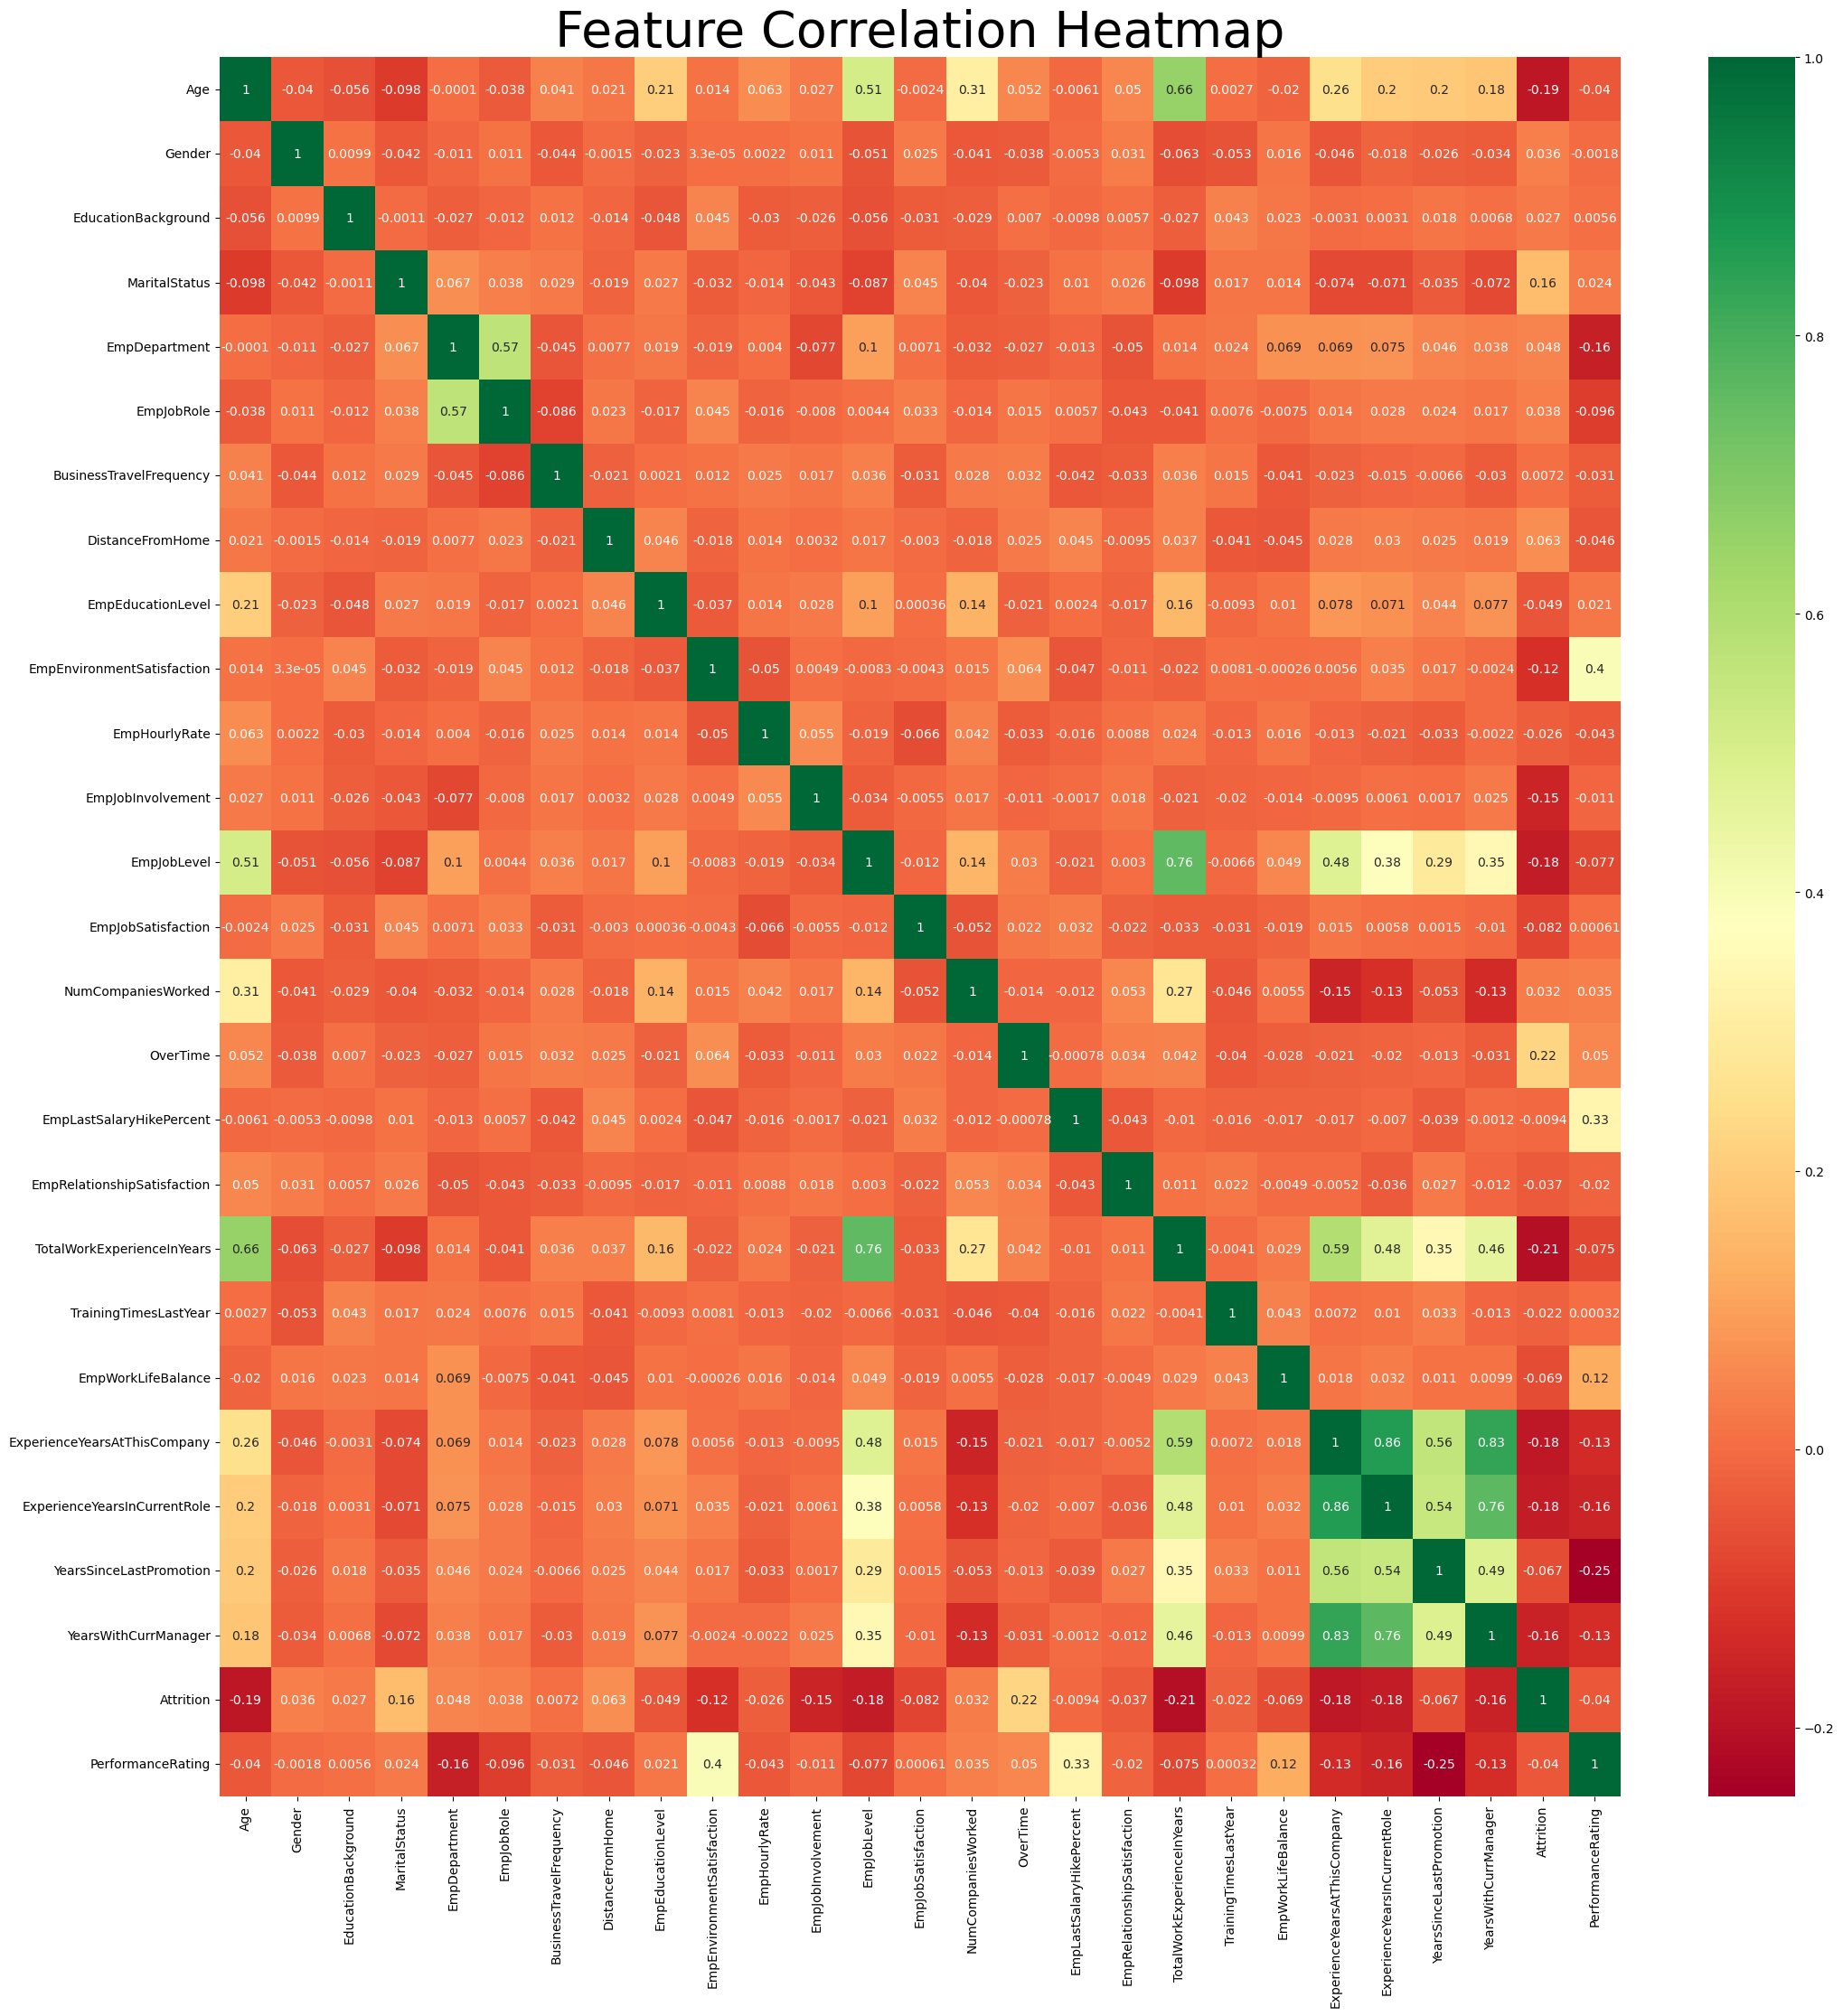

In [32]:
# Correlation Analysis
plt.figure(figsize=(25,25))
sns.heatmap(data=data.corr(),annot=True,cmap='RdYlGn')
plt.title('Feature Correlation Heatmap',fontsize=40)
plt.show()

- Gender , EducationBackground , EmpJobSatisfaction , TrainingTimesLastYear columns have no corelation or little corelation with target variable.
- So, we drop them.

# 2. Top factors effecting performance

In [35]:
# Correlation analysis to find top factors effecting performance
correlation = data.corr()["PerformanceRating"].abs().sort_values(ascending=False)
top_3_factors = correlation[1:4]
print("\nTop 3 Factors effecting Employee Performance:\n", top_3_factors)


Top 3 Factors effecting Employee Performance:
 EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
YearsSinceLastPromotion       0.249492
Name: PerformanceRating, dtype: float64


### Insights
#### Top 3 Factors Effecting Employee Performance
- EmpEnvironmentSatisfaction (0.40 correlation) - Employees who rate their work environment highly tend to perform better.
- EmpLastSalaryHikePercent (0.33 correlation) - Higher salary hikes are linked to better performance.
- YearsSinceLastPromotion (0.25 correlation) - Employees who go longer without a promotion tend to perform worse.

### FEATURE SCALING 

#### Using MinMaxScaler
MinMaxScaler is a data preprocessing technique that scales features to a specified range, typically between 0 and 1. 

In [39]:
from sklearn.preprocessing import MinMaxScaler
df=MinMaxScaler().fit_transform(data.iloc[:,:-1])
df

array([[0.33333333, 1.        , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.69047619, 1.        , 0.4       , ..., 0.33333333, 0.875     ,
        0.        ],
       [0.52380952, 1.        , 0.2       , ..., 0.33333333, 1.        ,
        0.        ],
       ...,
       [0.76190476, 1.        , 0.6       , ..., 0.66666667, 1.        ,
        0.        ],
       [0.38095238, 0.        , 0.6       , ..., 1.        , 0.875     ,
        0.        ],
       [0.14285714, 0.        , 0.2       , ..., 0.52832083, 0.        ,
        1.        ]])

### DATA SPLITTING

In [41]:
x = pd.DataFrame(df,columns=data.columns[:-1]) # Independent variables
x

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.333333,1.0,0.4,1.0,1.0,0.722222,1.0,0.321429,0.50,1.000000,...,0.071429,1.000000,0.45,0.333333,0.333333,0.692308,0.777778,0.000000,1.000,0.0
1,0.690476,1.0,0.4,1.0,1.0,0.722222,1.0,0.464286,0.75,1.000000,...,0.071429,1.000000,0.95,0.333333,0.666667,0.461538,0.777778,0.333333,0.875,0.0
2,0.523810,1.0,0.2,0.5,1.0,0.722222,0.5,0.142857,0.75,1.000000,...,0.714286,0.666667,0.95,0.333333,0.666667,1.000000,1.000000,0.333333,1.000,0.0
3,0.547619,1.0,0.0,0.0,0.6,0.444444,1.0,0.321429,0.75,0.333333,...,0.285714,0.333333,1.00,0.333333,0.333333,1.000000,0.666667,1.000000,0.750,0.0
4,1.000000,1.0,0.4,1.0,1.0,0.722222,1.0,0.535714,0.75,0.000000,...,0.214286,1.000000,0.45,0.000000,0.666667,0.076923,0.222222,0.528321,0.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.214286,0.0,0.6,0.0,1.0,0.722222,0.5,0.071429,0.00,1.000000,...,0.642857,0.333333,0.25,0.666667,0.666667,0.384615,0.555556,0.000000,0.500,0.0
1196,0.452381,1.0,0.2,1.0,0.2,0.833333,1.0,0.321429,0.25,1.000000,...,0.428571,0.000000,0.15,0.333333,0.666667,0.000000,0.000000,0.000000,0.000,0.0
1197,0.761905,1.0,0.6,0.5,0.2,0.833333,1.0,0.964286,0.00,1.000000,...,0.000000,0.666667,0.95,0.666667,0.666667,1.000000,0.888889,0.666667,1.000,0.0
1198,0.380952,0.0,0.6,1.0,0.0,0.055556,1.0,0.285714,0.50,1.000000,...,0.214286,0.333333,0.40,0.666667,1.000000,0.538462,0.777778,1.000000,0.875,0.0


In [42]:
x.drop(['Gender', 'EducationBackground', 'EmpJobSatisfaction', 'TrainingTimesLastYear'],axis=1,inplace=True)

In [43]:
y=data['PerformanceRating'] # Dependent variable
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

### train_test_split for splitting the data

In [45]:
# Importing train_test_split for splitting data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 22)
(240, 22)
(960,)
(240,)


In [46]:
# Check for Bias
y_train.value_counts()

PerformanceRating
3    690
2    165
4    105
Name: count, dtype: int64

#### Data Balancing :
- Data Balancing is the process of adjusting the class distribution in a dataset such that each class has a relatively equal number of Samples.
- when dealing with imbalanced datasets, where one class's rarity can lead to biased model predictions and it reduce the models overal performance for that we use SMOTE techinique.
- " SMOTE " Generating synthetic examples for the minority class based on the existing data.

In [48]:
# Initializing SMOTE
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)

# fitting and resampling training data
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [49]:
# importing counter to check count of each label in target column
from collections import Counter 
print("Class Before SMOTE : ",Counter(y_train))                        
print("Class After SMOTE : ",Counter(y_train_smote))                  

Class Before SMOTE :  Counter({3: 690, 2: 165, 4: 105})
Class After SMOTE :  Counter({2: 690, 3: 690, 4: 690})


In [50]:
# Save the data
import pickle
with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump((x_train_smote, x_test, y_train_smote, y_test), f)